In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
#splitting training and testing data
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

Reference:
* 0: airplane

* 1: automobile

* 2: bird

* 3: cat

* 4: deer

* 5: dog

* 6: frog

* 7: horse

* 8: ship

* 9: truck

In [4]:
fig_class=[ "airplane", "automobile","bird","cat","deer", "dog","frog","horse","ship","truck"]
fig_class[0]

'airplane'

In [5]:
x_train[0].shape
#(32*32 and color scheme is RGB)

(32, 32, 3)

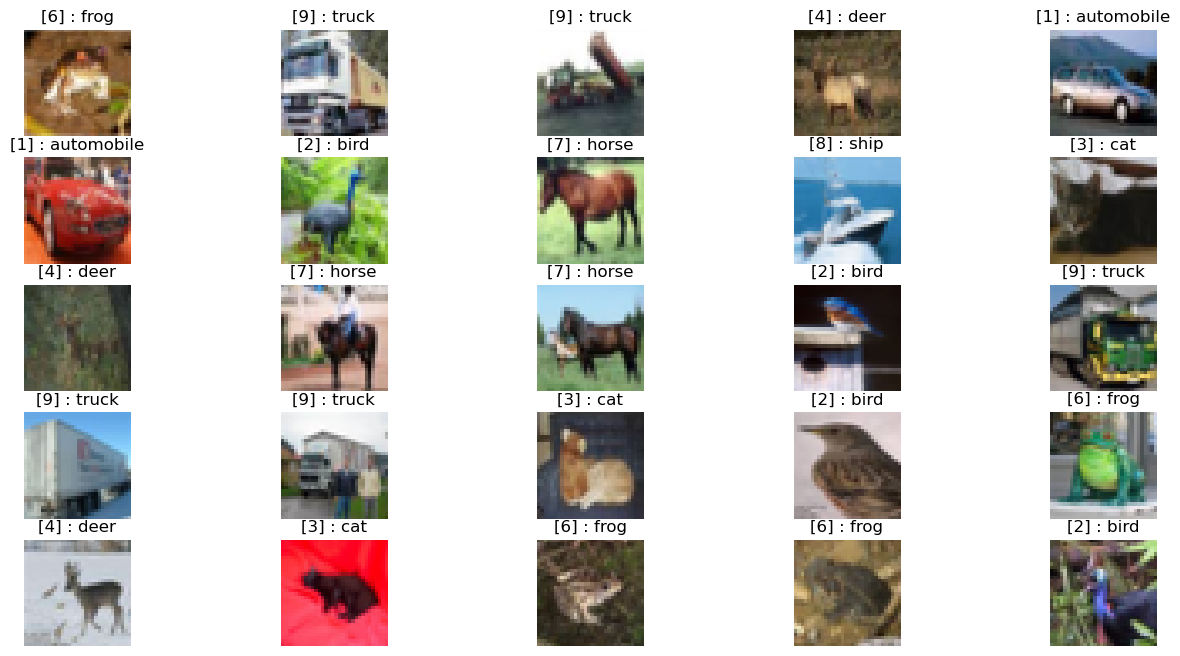

In [6]:
#create figure
fig=plt.figure(figsize=(16,8))

#setting values to rows and columns
rows=5
columns=5

for i in range(25):
    fig.add_subplot(rows,columns,i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.title(f'{y_train[i]} : {fig_class[int(y_train[i])]}')
    

In [7]:
print(len(x_train))
x_train.shape
#50k worth of train datas

50000


(50000, 32, 32, 3)

In [8]:
print(len(x_test))
x_test.shape
#10k worth of train datas

10000


(10000, 32, 32, 3)

In [9]:
#Searching for max value of pixel
max=0
for i in range(0,50000):
    max_comp=x_train[i].max()
    if (max < max_comp):
        max=max_comp
print (max)

255


In [10]:
#Normalizing our pixels so that it becomes easier to compute
x_train=x_train/max
x_test=x_test/max

In [11]:
y_train 
#one_hot encoding (sort of)

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
from tensorflow.keras.utils import to_categorical
#as we are dealing with multiple classification

In [13]:
y_cat_train=to_categorical(y_train,10)
y_cat_test=to_categorical(y_test,10)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [15]:
#Sequential
model=Sequential()

# 3*3 filter decreases our 32*32 size by 2 in each rows and columns making it 30*30
#relu gives max(0,x)
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape = (32,32,3), activation='relu'))

# 3*3 filter again decreases by 2 in each rows and columns making it 28*28
# 2*2 maxpoolsize divides size by 2 making 14*14
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 5*5 filter now decreases 14*14 data size to 10*10 by decreasing 4 in each rows and columns
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))

# 5*5 filter again decreases 10*10 data size to 6*6 by decreasing 4 in each rows and columns
# 2*2 maxpoolsize thus divides 6*6 rows and column to 3*3
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# flattens multidimension to single dimension
model.add(Flatten())

model.add(Dense(256, activation='relu'))

#Output layer as 10 categories exist
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [16]:
model.summary()
#params=output_size * (input_size + 1)  For dense layers
#params=output_channels * (input_channels * window_size + 1) Fro Convolution layers

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 32)        25632     
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                    

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
# to prevent overfitting

In [18]:
early_stop=EarlyStopping(monitor='val_loss',patience=3)

In [19]:
model.fit(x_train,y_cat_train,epochs=15,
          validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 26s 15ms/step - loss: 1.5273 - accuracy: 0.4383 - val_loss: 1.2216 - val_accuracy: 0.5554
Epoch 2/15
1563/1563 [==============================] - 21s 14ms/step - loss: 1.1250 - accuracy: 0.5967 - val_loss: 1.1470 - val_accuracy: 0.5816
Epoch 3/15
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9658 - accuracy: 0.6554 - val_loss: 0.9474 - val_accuracy: 0.6694
Epoch 4/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8677 - accuracy: 0.6923 - val_loss: 0.9276 - val_accuracy: 0.6803
Epoch 5/15
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7937 - accuracy: 0.7188 - val_loss: 0.9455 - val_accuracy: 0.6763
Epoch 6/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7353 - accuracy: 0.7409 - val_loss: 0.8778 - val_accuracy: 0.7024
Epoch 7/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6798 - accuracy: 0.7608 - val_loss: 0.8935 -

In [20]:
metrics=pd.DataFrame(model.history.history)

<AxesSubplot:>

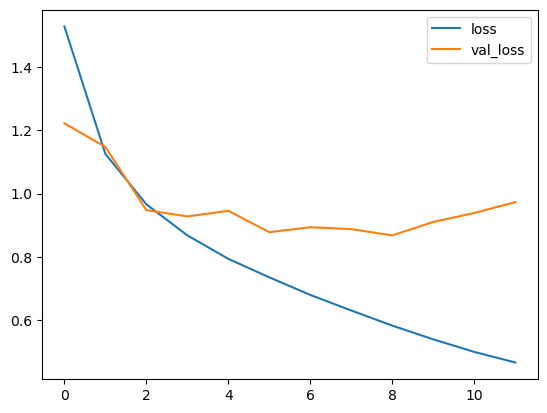

In [21]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

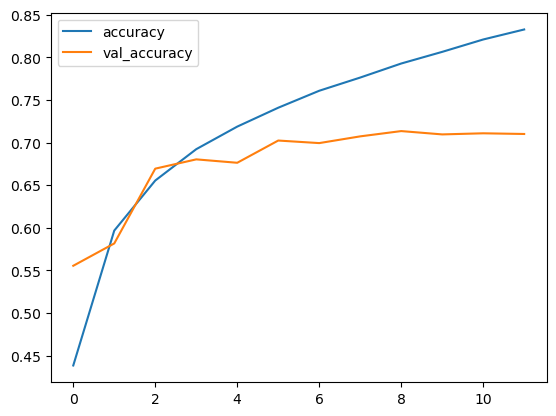

In [22]:
metrics[['accuracy', 'val_accuracy']].plot()

In [23]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.9728 - accuracy: 0.7101


[0.9727666974067688, 0.710099995136261]

In [24]:
prediction = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [25]:
predictions = [np.argmax(x, axis=0) for x in prediction]

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1000
           1       0.87      0.82      0.85      1000
           2       0.62      0.59      0.61      1000
           3       0.50      0.49      0.50      1000
           4       0.66      0.66      0.66      1000
           5       0.58      0.64      0.61      1000
           6       0.83      0.74      0.78      1000
           7       0.72      0.76      0.74      1000
           8       0.81      0.83      0.82      1000
           9       0.80      0.83      0.82      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



In [28]:
import seaborn as sns

<AxesSubplot:>

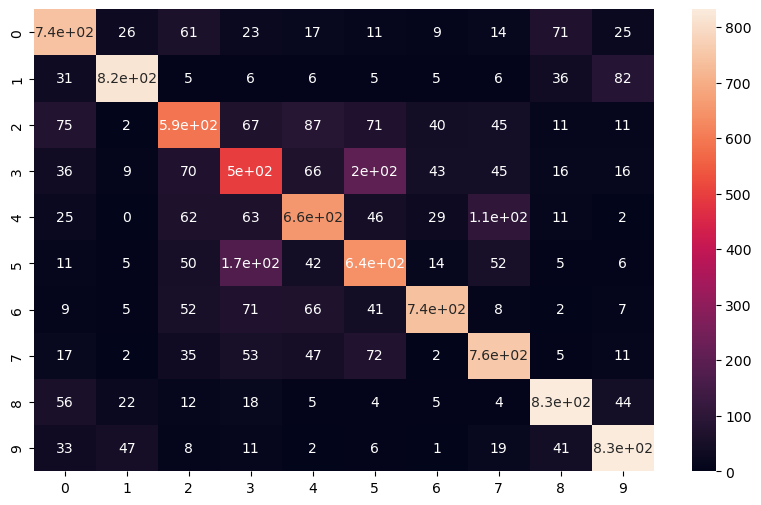

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions),annot=True)

In [30]:
import random

CORRECT PREDICTIONS


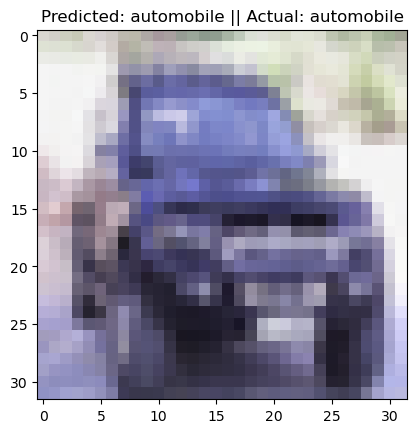

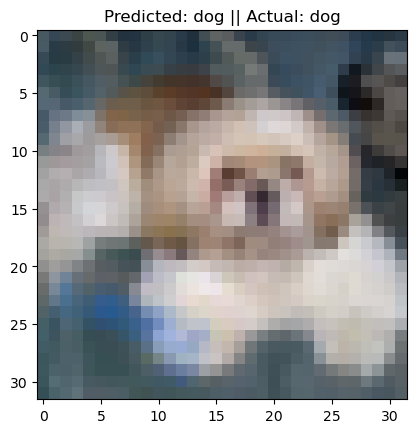

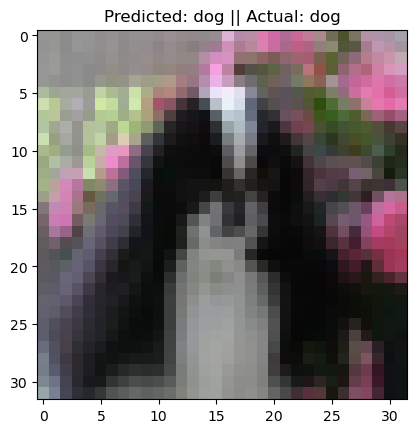

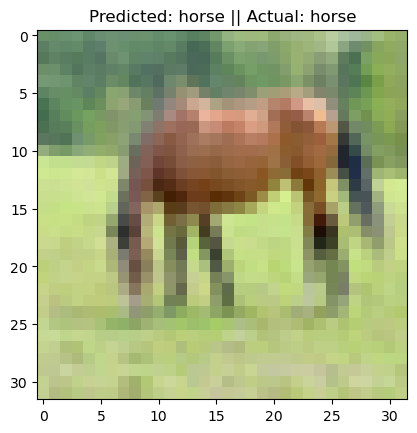

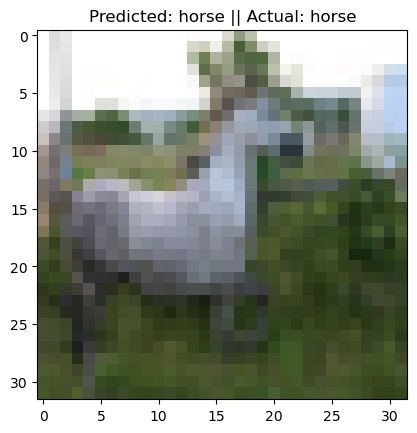

In [31]:
#Lets see which predictions were correct and which were incorrect
count=0
print("CORRECT PREDICTIONS")
#Correct Predictions:
for i in range(0,10000):
    #to randomly check our sample data
    for_random=np.random.binomial(n=1,p=0.1,size=[1])
    
    #our test datas
    test_image=x_test[i].reshape(1,32,32,3)
    #gives back the prediction
    predict_image=model.predict(test_image,verbose=0)
    prediction_value=np.argmax(predict_image,axis=1)
    
    #plotting
    if(int(y_test[i])==prediction_value and for_random):
            plt.title(f"Predicted: {fig_class[int(prediction_value)]} || Actual: {fig_class[int(y_test[i])]}")
            plt.imshow(x_test[i])
            plt.show()
            count+=1
    if count == 5:
        break
            

INCORRECT PREDICTIONS


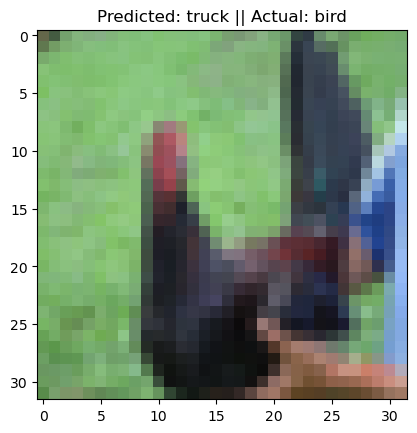

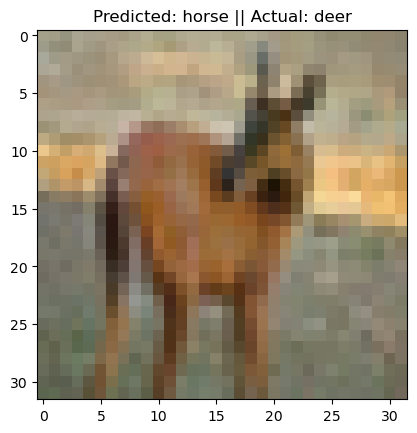

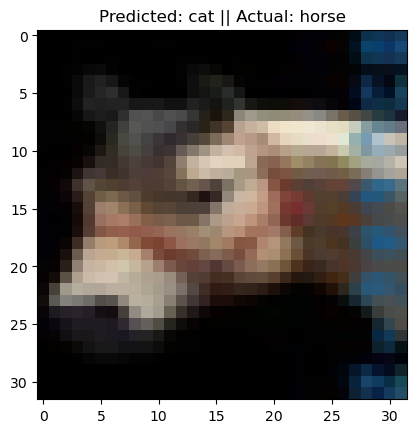

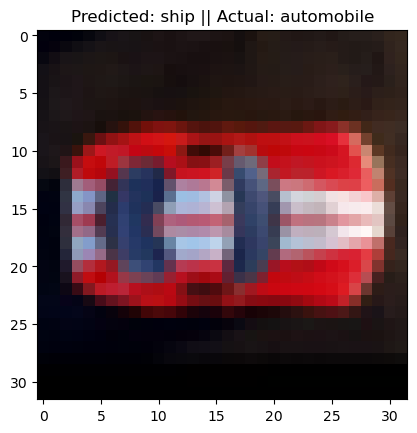

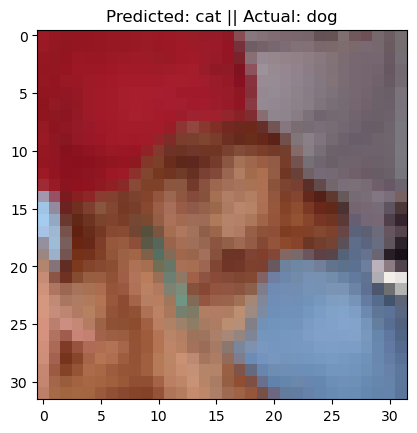

In [32]:
#Lets see which predictions were incorrect 
count=0
print("INCORRECT PREDICTIONS")
#InCorrect Predictions:
for i in range(0,10000):
    #to randomly check our sample data
    for_random=np.random.binomial(n=1,p=0.1,size=[1])
    
    #our test datas
    test_image=x_test[i].reshape(1,32,32,3)
    #gives back the prediction
    predict_image=model.predict(test_image,verbose=0)
    prediction_value=np.argmax(predict_image,axis=1)
    
    #plotting
    if(int(y_test[i])!=prediction_value and for_random):
            plt.title(f"Predicted: {fig_class[int(prediction_value)]} || Actual: {fig_class[int(y_test[i])]}")
            plt.imshow(x_test[i])
            plt.show()
            count+=1
    if count == 5:
        break
            


In [33]:
def predict_classes(image,index):
    #image_resize=image.resize(32,32)
    image_reshape=image.reshape(1,32,32,3)
    predict_image=model.predict(image_reshape,verbose=0)
    prediction_value=int(np.argmax(predict_image,axis=1))
    plt.title(f"Predicted: {fig_class[prediction_value]} || Actual: {fig_class[int(y_test[index])]}")
    plt.imshow(image)
    plt.show()
    
    

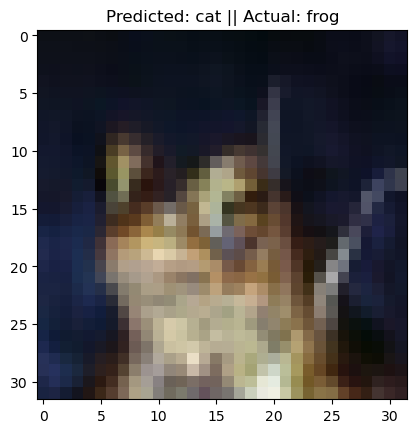

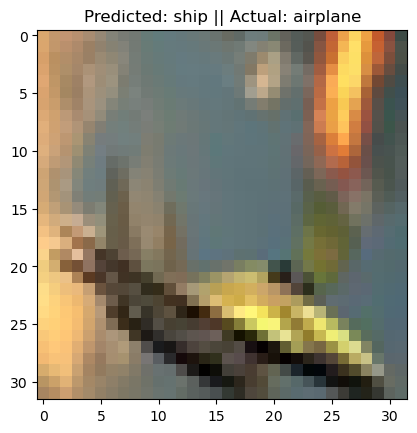

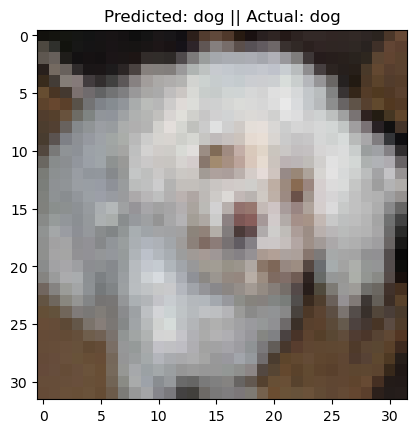

In [34]:
predict_classes(x_test[1034],1034)
predict_classes(x_test[125],125)
predict_classes(x_test[1000],1000)




In [68]:
#predicting on external pictures
from PIL import Image
import matplotlib.image as image
from numpy import array


In [73]:
def predict_externalImg_classes(image,index):
    #image_resize=image.resize((32,32))
    image_reshape=image.reshape(1,32,32,3)
    predict_image=model.predict(image_reshape,verbose=0)
    prediction_value=int(np.argmax(predict_image,axis=1))
    plt.title(f"Predicted: {fig_class[prediction_value]} || Actual: {fig_class[index]}")
    plt.imshow(image)
    plt.show()
    

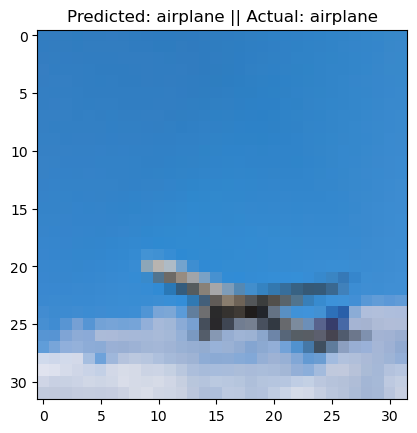

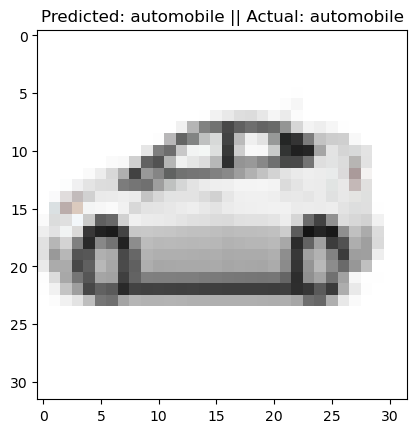

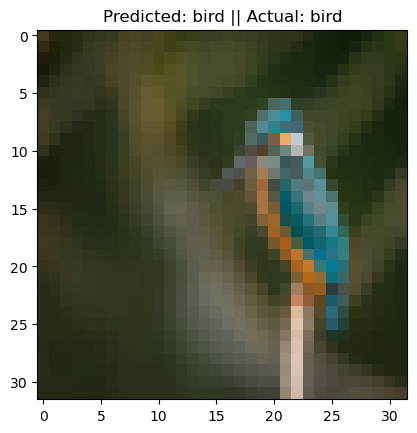

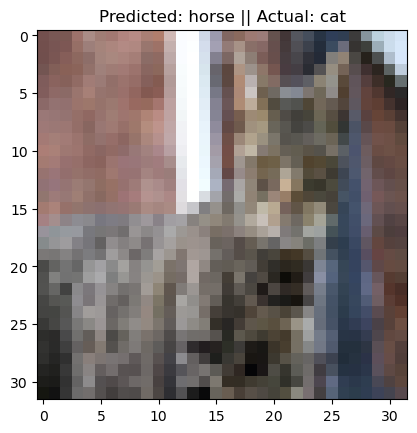

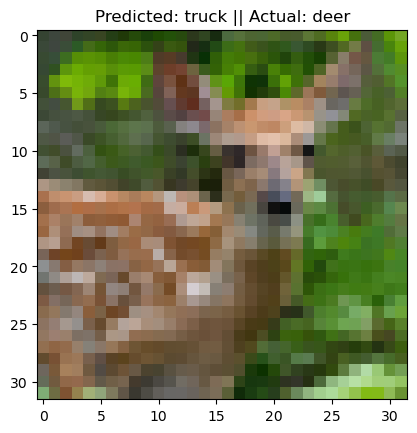

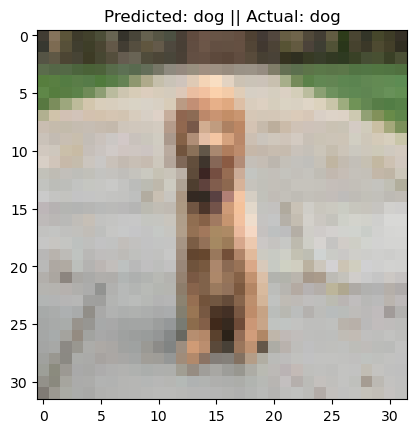

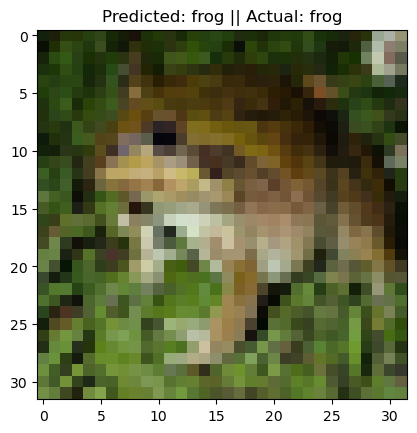

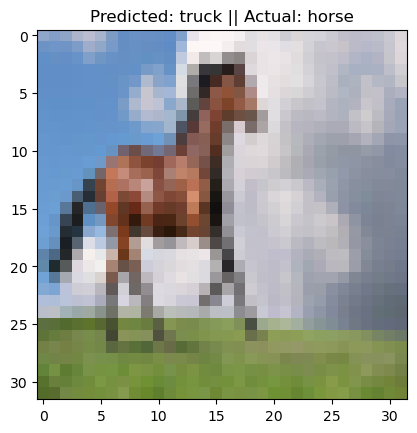

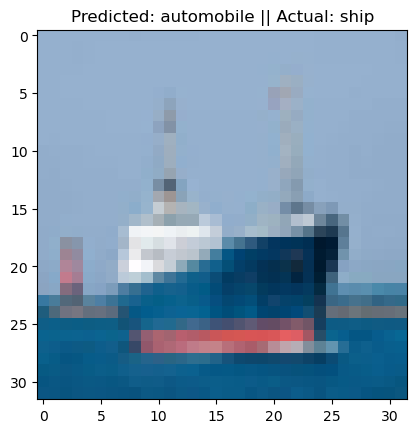

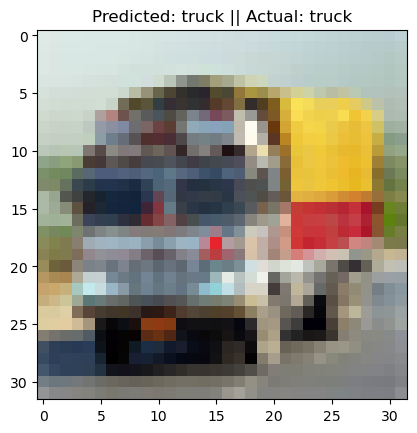

In [75]:
#Predicting External Image
for i in range (0,10):
    image=Image.open(rf"photo\{i}.jfif")
    image=image.resize((32,32))
    image_ar=array(image)
    predict_externalImg_classes(image_ar,i)


In [39]:
#save model
model.save('CNN_cfar10_model.h5')

In [40]:
from tensorflow import keras

In [42]:
model2=keras.models.load_model('CNN_cfar10_model.h5')

1/1 [==============================] - 0s 97ms/step


array([[3.7084050e-03, 1.5077644e-05, 8.7623244e-05, 8.5182810e-01,
        4.6076466e-04, 1.3519210e-01, 7.9361107e-03, 4.5054756e-05,
        4.7215380e-04, 2.5463526e-04]], dtype=float32)